**<h3><center>EN2550 Exercise 5 Blobs and Fitting Basics</center></h3>**
*Name - Ekanayake E.M.S.S.N.*
<br>
*Index no - 190164M*
<hr>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

**Q 01**

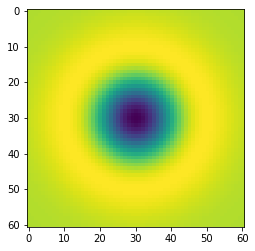

In [15]:
sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw +1, 1), np.arange(-hw, hw +1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

plt.imshow(log)
plt.show()

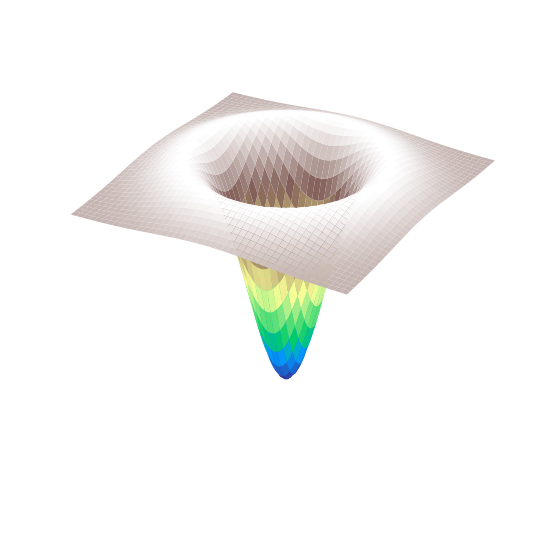

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X,Y, log, cmap=cm.terrain, linewidth = 0, antialiased = True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

**Q 02**

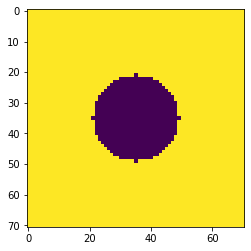

In [17]:
w, h = 71,71
hw = w//2
hh = h//2

f = np.ones((h,w), dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh +1, 1), np.arange(-hw, hw +1, 1))

r = w//5
f *= X**2 + Y**2 > r**2

plt.imshow(f)
plt.show()

(35, 35, 5)
10


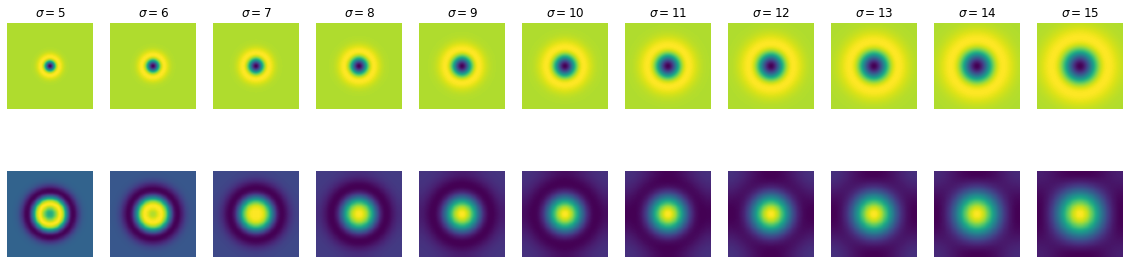

In [26]:
s = 11
fig, ax = plt.subplots(2, s, figsize=(20,5))
scale_space = np.empty((h,w,s), dtype = np.float32)
sigmas = np.arange(5,16,1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw +1, 1), np.arange(-log_hw, log_hw +1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1, log)
    scale_space[:,:,i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')

indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print(indices)
print(sigmas[indices[2]])


Maximum response occurs at, $\sigma = {}$ r/ $\sqrt{2}$.
That is same as the value above.

**Q 03**

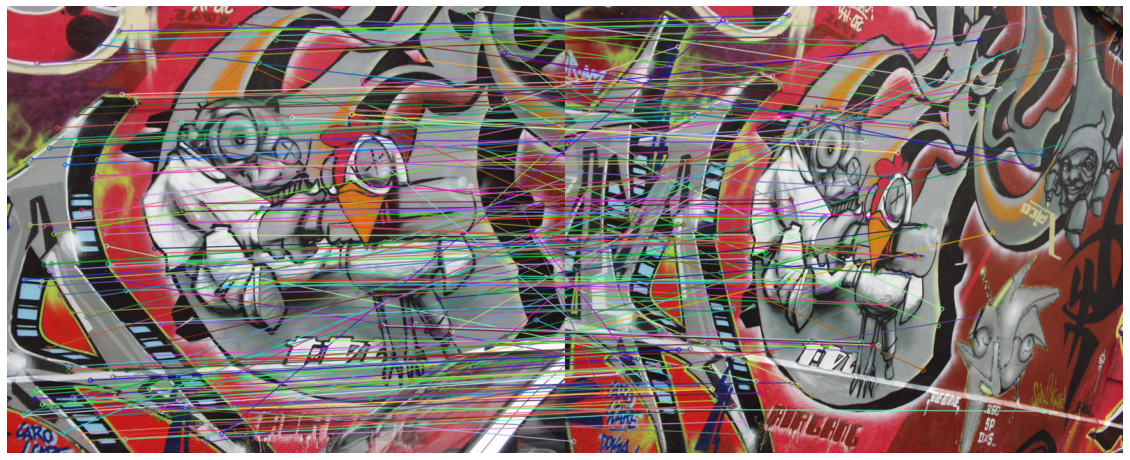

In [36]:
#compared img1 and img3
#only the first 200 matches are shown
im_1 = cv.imread(r'images\graf\img1.ppm', cv.IMREAD_COLOR)
assert im_1 is not None
im_2 = cv.imread(r'images\graf\img3.ppm', cv.IMREAD_COLOR)
assert im_2 is not None

im_1 = cv.cvtColor(im_1, cv.COLOR_BGR2RGB)
im_2 = cv.cvtColor(im_2, cv.COLOR_BGR2RGB)

sift = cv.SIFT_create()

kp1, des1 = sift.detectAndCompute(im_1,None)
kp2, des2 = sift.detectAndCompute(im_2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(im_1,kp1,im_2,kp2,matches[:200],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(figsize = (20,20))
ax.imshow(img3)
ax.axis('off')
plt.show()

**Q 04**

[]

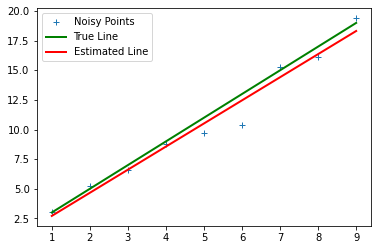

In [55]:
m = 2 
c = 1
x = np.arange (1, 10, 1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np.zeros(x.shape) # o[-1] = 20 # Outlier
y = m * x + c + noise + o

n = len(x)
X = np.concatenate([x.reshape((n,1)), np.ones((n,1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot(x, y, '+', label='Noisy Points')
plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g' , linewidth=2, label='True Line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r' , linewidth=2, label='Estimated Line')

plt.legend()
plt.plot()

**Q 05**

[]

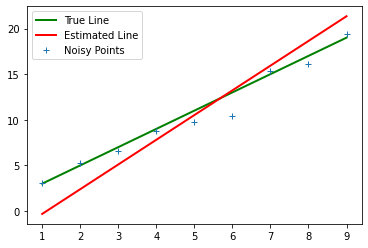

In [56]:
m = 2
c = 1
x = np.arange(1,10,1)
np.random.seed(45)
noise = np.random.randn(len(x))
o = np.zeros(x.shape)
y = m*x + c + noise + o

n = len(x)
u11 = np.sum((x-np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((x-np.mean(y))**2)
U = np.array([[u11,u12],[u21,u22]])
W, V = np.linalg.eig(U)
ev_corresponding_to_smallest_ev = V[:, np.argmin(W)]

a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a*np.mean(x) + b*np.mean(y)
mstar = -a/b 
cstar = d/b

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color='g' , linewidth=2, label='True Line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r' , linewidth=2, label='Estimated Line')
plt.plot(x, y, '+', label='Noisy Points')
plt.legend(loc='best')
plt.plot()